### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [2]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [4]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [5]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

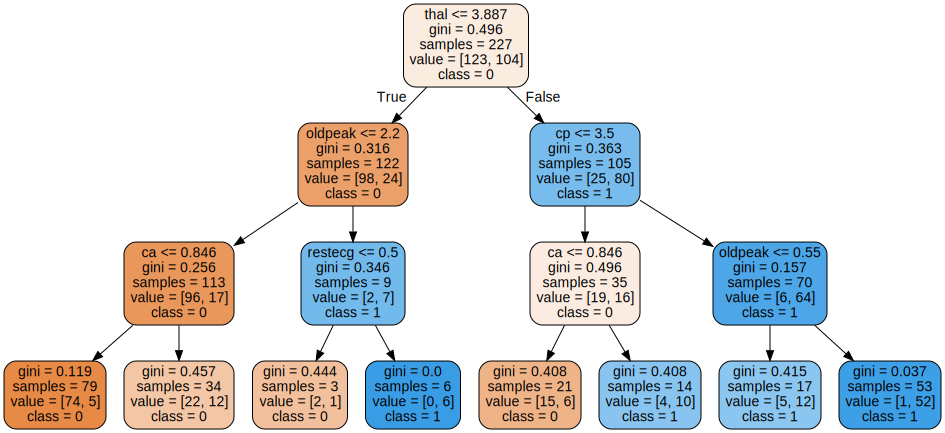

In [13]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],#บอกชื่อตัวแปรvisualization
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph#condition เป็นจริงไปซ้าย เป็นเท็จไปขวา

In [8]:
data.columns[:-1] #ดูตัวแปรต้นที่เราใช้

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [11]:
clf = DecisionTreeClassifier()

In [14]:
from sklearn.metrics import classification_report
bagged_treees = BaggingClassifier(estimator=clf, n_estimators=100, max_samples=0.5)
bagged_treees.fit(X_train, y_train)
print(classification_report(y_test, bagged_treees.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        41
           1       0.79      0.74      0.76        35

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [15]:
forest = RandomForestClassifier(n_estimators=200, max_depth=6)
forest.fit(X_train, y_train)
print(classification_report(y_test, forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        41
           1       0.81      0.71      0.76        35

    accuracy                           0.79        76
   macro avg       0.79      0.78      0.79        76
weighted avg       0.79      0.79      0.79        76



#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

# For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.

In [33]:
dt = DecisionTreeClassifier(random_state=42)

# เลือก hyperparameters 3 ตัวขึ้นไป
dt_params = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid = GridSearchCV(dt, dt_params, scoring='f1_macro', cv=5)
dt_grid.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1_macro')

In [35]:
base_clf = DecisionTreeClassifier(random_state=42)
bagging = BaggingClassifier(estimator=base_clf, random_state=42)

# เลือก hyperparameters 3 ตัวขึ้นไปสำหรับ Bagging
bagging_params = {
    'n_estimators': [50, 100, 150],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

bagging_grid = GridSearchCV(bagging, bagging_params, scoring='f1_macro', cv=5)
bagging_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                         random_state=42),
             param_grid={'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [50, 100, 150]},
             scoring='f1_macro')

In [22]:
# Grid search สำหรับแต่ละโมเดล
dt_grid = GridSearchCV(dt, dt_params, scoring='f1_macro', cv=5)
dt_grid.fit(X_train, y_train)

bagging_grid = GridSearchCV(bagging, bagging_params, scoring='f1_macro', cv=5)
bagging_grid.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__max_depth': [5, 8, 10],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [100, 200,
                                                                  300]},
             refit='accuracy', scoring=['accuracy', 'f1_macro'])

In [36]:
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, None],
    'max_features': ['sqrt', 'log2']
}
rf_grid = GridSearchCV(rf, rf_params, scoring='f1_macro', cv=5)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 6, None],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]},
             scoring='f1_macro')

In [39]:
print('Decision Trees')
print(classification_report(y_test, dt_grid.predict(X_test)))
print()

print('Bagged Decision Trees')
print(classification_report(y_test, bagging_grid.predict(X_test)))
print()

print('Random Forest')
print(classification_report(y_test, rf_grid .predict(X_test)))
print()

Decision Trees
              precision    recall  f1-score   support

           0       0.71      0.85      0.78        41
           1       0.78      0.60      0.68        35

    accuracy                           0.74        76
   macro avg       0.75      0.73      0.73        76
weighted avg       0.74      0.74      0.73        76


Bagged Decision Trees
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        41
           1       0.81      0.71      0.76        35

    accuracy                           0.79        76
   macro avg       0.79      0.78      0.79        76
weighted avg       0.79      0.79      0.79        76


Random Forest
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        41
           1       0.81      0.71      0.76        35

    accuracy                           0.79        76
   macro avg       0.79      0.78      0.79        76
weighted avg       0.

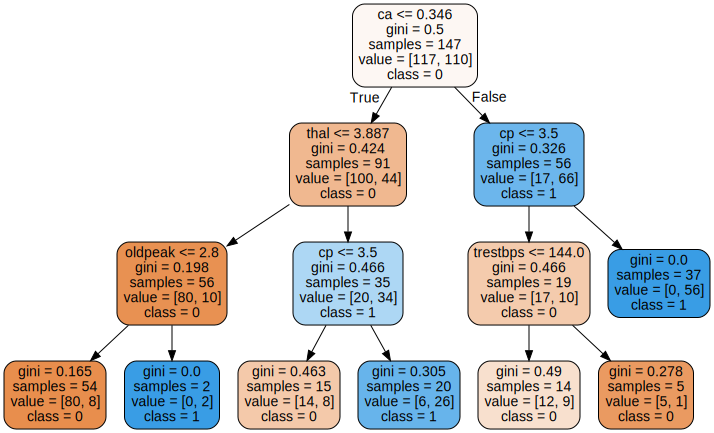

In [42]:
best_rf = rf_grid.best_estimator_

first_tree = best_rf.estimators_[0]

plot_data = export_graphviz(first_tree,out_file=None,filled=True,rounded=True,feature_names=data.columns[:-1],class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph



# What is the best model
โมเดลที่ดีที่สุดคือ Bagged Decision Trees หรือ Random Forest เพราะทั้งสองมีค่าความแม่นยำ (accuracy) และ f1_macro สูงที่สุดเท่ากันที่ 0.79 แสดงว่าโมเดลนี้สามารถทำนายได้อย่างแม่นยำ

# Plot the best tree model?
เราแสดงโครงสร้างของต้นไม้ตัวแรกจากโมเดล Random Forest โดยใช้เครื่องมือช่วยพล็อตที่ชื่อ export_graphviz ซึ่งจะเห็นว่าแต่ละโหนดในต้นไม้แบ่งข้อมูลด้วยเงื่อนไขอะไรบ้าง และแต่ละใบไม้แสดงการจัดกลุ่มคลาสอย่างไร ช่วยเข้าใจวิธีการตัดสินใจของโมเดลมากยิ่งขึ้น



# What hyperparameters did you choose? (explain in words, not in sklearn's parameter name)
-กำหนดจำนวนต้นไม้ในโมเดลเพื่อให้มีต้นไม้หลายต้นช่วยกันตัดสินใจจำกัดความลึกของต้นไม้เเละเพื่อป้องกันไม่ให้ต้นไม้ซับซ้อนเกินไปจนเกิดการเรียนรู้ที่มากเกินจริง
กำหนดจำนวนฟีเจอร์ที่ใช้ในแต่ละขั้นตอนของการแบ่งข้อมูล

# What are the best values of your hyperparameters?
-จำนวนต้นไม้ที่ใช้ใน Random Forest คือ 200 ต้น
,ความลึกสูงสุดของต้นไม้คือประมาณ 6 ชั้น
เเละจำนวนfeatureที่ใช้ในแต่ละโหนดแบ่งข้อมูล คือประมาณรากที่สองของจำนวนฟีเจอร์ทั้งหมดในชุดข้อมูล